In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("default of credit card clients.xls", skiprows=1)

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
print("rows:",data.shape[0]," columns:", data.shape[1])

rows: 30000  columns: 25


In [5]:
data_clean = data.drop(columns=["ID","SEX"])
data_clean.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
total = data_clean.isnull().sum()
percent = (data_clean.isnull().sum()/data_clean.isnull().count()*100)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
outliers = {}
for i in range(data_clean.shape[1]):
    min_t = data_clean[data_clean.columns[i]].mean() - (3 * data_clean[data_clean.columns[i]].std())
    max_t = data_clean[data_clean.columns[i]].mean() + (3 * data_clean[data_clean.columns[i]].std())
    count = 0
    for j in data_clean[data_clean.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    percentage = count/data_clean.shape[0]
    outliers[data_clean.columns[i]] = "%.3f" % percentage

print(outliers)

{'LIMIT_BAL': '0.004', 'EDUCATION': '0.011', 'MARRIAGE': '0.000', 'AGE': '0.005', 'PAY_0': '0.005', 'PAY_2': '0.005', 'PAY_3': '0.005', 'PAY_4': '0.006', 'PAY_5': '0.005', 'PAY_6': '0.004', 'BILL_AMT1': '0.023', 'BILL_AMT2': '0.022', 'BILL_AMT3': '0.022', 'BILL_AMT4': '0.023', 'BILL_AMT5': '0.022', 'BILL_AMT6': '0.022', 'PAY_AMT1': '0.013', 'PAY_AMT2': '0.010', 'PAY_AMT3': '0.012', 'PAY_AMT4': '0.013', 'PAY_AMT5': '0.014', 'PAY_AMT6': '0.015', 'default payment next month': '0.000'}


In [8]:
target = data_clean["default payment next month"]
yes = target[target == 1].count()
no = target[target == 0].count()

print("yes %: " + str(yes/len(target)*100) + " - no %: " + str(no/len(target)*100))

yes %: 22.12 - no %: 77.88000000000001


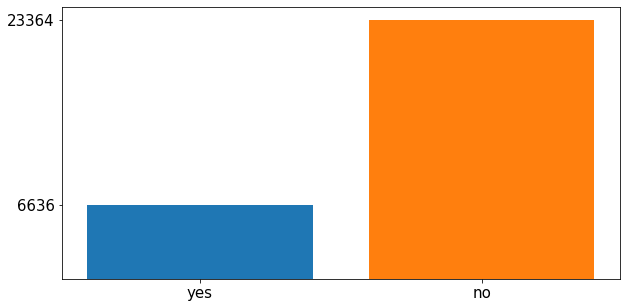

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
plt.bar("yes", yes)
plt.bar("no", no)
ax.set_yticks([yes,no])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [10]:
data_yes = data_clean[data_clean["default payment next month"] == 1]
data_no = data_clean[data_clean["default payment next month"] == 0]

over_sampling = data_yes.sample(no, replace=True, random_state=0)

data_resampled = pd.concat([data_no, over_sampling], axis=0)

In [11]:
target_2 = data_resampled["default payment next month"]
yes_2 = target_2[target_2 == 1].count()
no_2 = target_2[target_2 == 0].count()

print("yes %: " + str(yes_2/len(target_2)*100) + " - no %: " + str(no_2/len(target_2)*100))

yes %: 50.0 - no %: 50.0


In [12]:
data_resampled.shape

(46728, 23)

In [13]:
data_resampled = data_resampled.reset_index(drop=True)
X = data_resampled.drop(columns=["default payment next month"])
y = data_resampled["default payment next month"]

In [14]:
X = (X - X.min())/(X.max() - X.min())
X.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.080808,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
1,0.040404,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
2,0.040404,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
3,0.040404,0.166667,0.666667,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.117974,0.178407,0.100102,0.276367,0.002862,0.001078,0.000733,0.001610,0.002345,0.001513
4,0.494949,0.166667,0.666667,0.137931,0.2,0.2,0.2,0.2,0.2,0.2,...,0.330672,0.671310,0.559578,0.625196,0.062961,0.023749,0.042409,0.032591,0.032237,0.026047


In [15]:
final_data = pd.concat([X, y], axis=1)
final_data.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.080808,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0
1,0.040404,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0
2,0.040404,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0
3,0.040404,0.166667,0.666667,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,...,0.178407,0.100102,0.276367,0.002862,0.001078,0.000733,0.001610,0.002345,0.001513,0
4,0.494949,0.166667,0.666667,0.137931,0.2,0.2,0.2,0.2,0.2,0.2,...,0.671310,0.559578,0.625196,0.062961,0.023749,0.042409,0.032591,0.032237,0.026047,0


In [16]:
final_data.to_csv("dccc_prepared.csv",index=False)